In [1]:
#import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [3]:
## Read the dataset using pandas
data = pd.read_csv("data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
## Devide the dataset into input and target, X contains input and Y contains target data
X = data.drop(['Outcome'],axis =1)
Y = data['Outcome']

In [5]:
## Input data scalling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
## Dimensionality reduction to 2d using Principle component analysis 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.26179749 0.21640127]
[40.10590727 36.4632608 ]


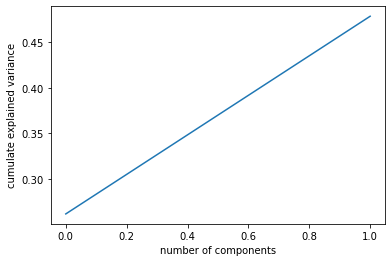

In [7]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulate explained variance')
plt.show()

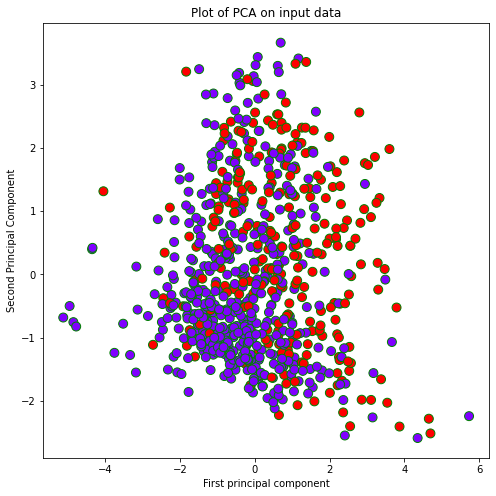

In [8]:
## Plotting the reduced dimensional data of the train split in a 2d plane
plt.figure(figsize=(8,8))
plt.scatter(X_pca[:,0],X_pca[:,1],c=Y,cmap='rainbow',edgecolors='g',s = 80)
plt.title('Plot of PCA on input data')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

In [9]:
#print(X_pca.shape, X.shape)

In [10]:
## Train, test, and validation split with ratio 70:20:10
X_train, X_rem, y_train, y_rem = train_test_split(X_pca,Y,train_size = 0.70, random_state = 42)
# split the training data into test and validation set
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.33)

Text(0, 0.5, 'Second Principal Component')

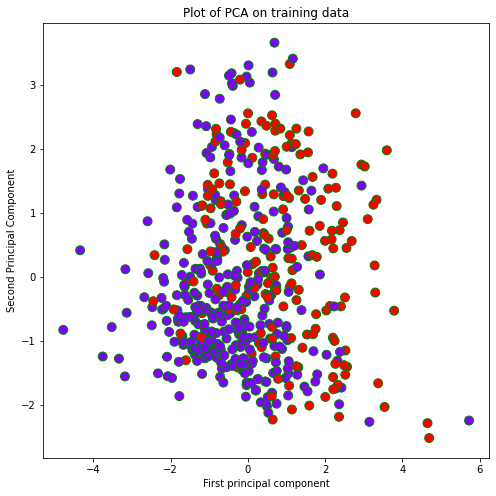

In [11]:
## Plotting the reduced dimensional training data of the train split in a 2d plane
plt.figure(figsize=(8,8))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',edgecolors = 'g',s= 80)
plt.title('Plot of PCA on training data')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [13]:
## Train the SVM classifier (sklearn.svm.SVC) on the reduced dimensional data generated after PCA
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    y_pred_v = model.predict(X_valid)
    print("Validation Accuracy with kernel", k)
    print(accuracy_score(y_valid, y_pred_v)) 
    y_pred = model.predict(X_test)
    print("Test Accuracy with kernel", k)
    print(accuracy_score(y_test, y_pred))  
    print("Classification Report with kernel", k)
    print(classification_report(y_test,y_pred))
    print("-------------------------------------------------")

Validation Accuracy with kernel linear
0.6883116883116883
Test Accuracy with kernel linear
0.7272727272727273
Classification Report with kernel linear
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        50
           1       0.65      0.48      0.55        27

    accuracy                           0.73        77
   macro avg       0.70      0.67      0.68        77
weighted avg       0.72      0.73      0.72        77

-------------------------------------------------
Validation Accuracy with kernel poly
0.6883116883116883
Test Accuracy with kernel poly
0.6753246753246753
Classification Report with kernel poly
              precision    recall  f1-score   support

           0       0.68      0.96      0.79        50
           1       0.67      0.15      0.24        27

    accuracy                           0.68        77
   macro avg       0.67      0.55      0.52        77
weighted avg       0.67      0.68      0.60        77



In [15]:
#It takes around 10  minutes to run
## Train the Support Vector Machine with Hyper-parameter Tuning
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly','sigmoid']}
 
grid_search = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.685 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.692 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.701 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.692 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.796 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.694 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.785 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.682 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.710 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.713 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.738 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.692 total time=   0.0s
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.787 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.694 total time=   0.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.785 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.673 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.710 total time=   0.0s
[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=0.713 total time=   0.2s
[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.722 total time=   0.0s
[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=0.720 total time=   0.3s
[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.682 total time=   0.2s
[CV 5/5] END .........C=1, g

[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=0.787 total time=   0.0s
[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.694 total time=   0.0s
[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.785 total time=   0.0s
[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.673 total time=   0.0s
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.710 total time=   0.0s
[CV 1/5] END ........C=10, gamma=1, kernel=poly;, score=0.713 total time=  10.7s
[CV 2/5] END ........C=10, gamma=1, kernel=poly;, score=0.731 total time=   3.2s
[CV 3/5] END ........C=10, gamma=1, kernel=poly;, score=0.720 total time=   5.2s
[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=0.682 total time=   4.2s
[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.682 total time=   8.4s
[CV 1/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.611 total time=   0.0s
[CV 2/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 3/5] END .....C=10, gamm

[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.785 total time=   0.1s
[CV 4/5] END .....C=100, gamma=1, kernel=linear;, score=0.673 total time=   0.1s
[CV 5/5] END .....C=100, gamma=1, kernel=linear;, score=0.710 total time=   0.1s
[CV 1/5] END .......C=100, gamma=1, kernel=poly;, score=0.713 total time=  34.4s
[CV 2/5] END .......C=100, gamma=1, kernel=poly;, score=0.722 total time=  10.8s
[CV 3/5] END .......C=100, gamma=1, kernel=poly;, score=0.720 total time=  14.2s
[CV 4/5] END .......C=100, gamma=1, kernel=poly;, score=0.682 total time=  26.5s
[CV 5/5] END .......C=100, gamma=1, kernel=poly;, score=0.682 total time=  40.3s
[CV 1/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.611 total time=   0.0s
[CV 2/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 3/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.598 total time=   0.0s
[CV 4/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.692 total time=   0.0s
[CV 5/5] END ....C=100, gamm

[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.710 total time=   3.1s
[CV 1/5] END ......C=1000, gamma=1, kernel=poly;, score=0.713 total time= 2.2min
[CV 2/5] END ......C=1000, gamma=1, kernel=poly;, score=0.722 total time= 2.9min
[CV 3/5] END ......C=1000, gamma=1, kernel=poly;, score=0.729 total time= 2.3min
[CV 4/5] END ......C=1000, gamma=1, kernel=poly;, score=0.682 total time= 3.2min
[CV 5/5] END ......C=1000, gamma=1, kernel=poly;, score=0.682 total time= 2.5min
[CV 1/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.611 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.598 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.692 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.664 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.778 total time=   0.3s
[CV 2/5] END .....C=1000, ga

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [18]:
# print best parameter after tuning
print(grid_search.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')


In [19]:
# print classification report after hyper-parameter tuning
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    grid_search = SVC(kernel=k)
    grid_search.fit(X_train, y_train)
    grid_predictions = grid_search.predict(X_test) 
    print("Classification Report with kernel",k,"after hyper-parameter tuning")
    print(classification_report(y_test, grid_predictions))
    print("------------------------------------------------------")

Classification Report with kernel linear after hyper-parameter tuning
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        50
           1       0.65      0.48      0.55        27

    accuracy                           0.73        77
   macro avg       0.70      0.67      0.68        77
weighted avg       0.72      0.73      0.72        77

------------------------------------------------------
Classification Report with kernel poly after hyper-parameter tuning
              precision    recall  f1-score   support

           0       0.68      0.96      0.79        50
           1       0.67      0.15      0.24        27

    accuracy                           0.68        77
   macro avg       0.67      0.55      0.52        77
weighted avg       0.67      0.68      0.60        77

------------------------------------------------------
Classification Report with kernel rbf after hyper-parameter tuning
              precision    reca

In [20]:
## Reducing the feature dimension of the above data into a one
## dimensional feature space using Linear Discriminant Analysis (LDA)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X,Y)

In [21]:
X_lda.shape

(768, 1)

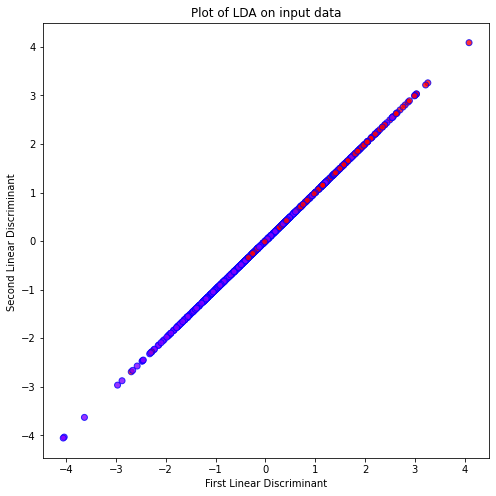

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(X_lda[:,0],X_lda[:,-1],c=Y,cmap='rainbow',alpha = 0.8,edgecolors='b')
plt.title("Plot of LDA on input data")
plt.xlabel('First Linear Discriminant')
plt.ylabel('Second Linear Discriminant ')
plt.show()

In [23]:
X_train_lda, X_rem_lda, y_train_lda, y_rem_lda = train_test_split(X_lda, Y, train_size = 0.70, random_state = 42)
# split the training data into test and validation set
X_valid_lda, X_test_lda, y_valid_lda, y_test_lda = train_test_split(X_rem_lda, y_rem_lda, test_size=0.33)
X_train_lda.shape

(537, 1)

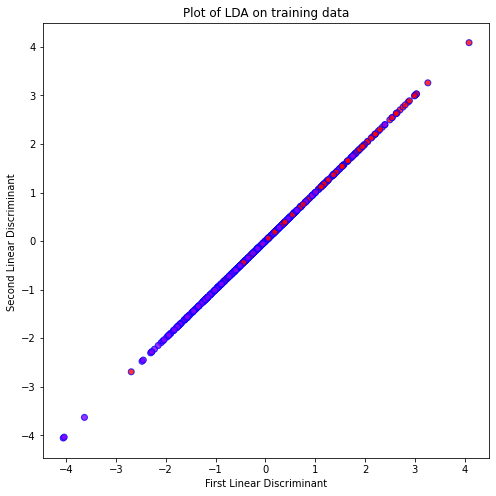

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(X_train_lda[:,0],X_train_lda[:,-1],c=y_train_lda,cmap='rainbow',alpha = 0.8,edgecolors='b')
plt.title("Plot of LDA on training data")
plt.xlabel('First Linear Discriminant')
plt.ylabel('Second Linear Discriminant ')
plt.show()

In [26]:
# SVM Kernels( Accuracy on training dataset)
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = SVC(kernel=k)
    model.fit(X_train_lda, y_train_lda)
    y_pred_lda = model.predict(X_valid_lda)
    print(k," validation accuracy")
    print(accuracy_score(y_valid_lda, y_pred_lda))
    y_pred_test_lda = model.predict(X_test_lda)
    print(k, " Test Accuracy")
    print(accuracy_score(y_test_lda, y_pred_test_lda))
    print("Classification Report with kernel", k)
    print(classification_report(y_test_lda,y_pred_test_lda))
    print("------------------------------------------------")

linear  validation accuracy
0.7987012987012987
linear  Test Accuracy
0.7532467532467533
Classification Report with kernel linear
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        56
           1       0.54      0.67      0.60        21

    accuracy                           0.75        77
   macro avg       0.70      0.73      0.71        77
weighted avg       0.77      0.75      0.76        77

------------------------------------------------
poly  validation accuracy
0.7532467532467533
poly  Test Accuracy
0.7402597402597403
Classification Report with kernel poly
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        56
           1       0.56      0.24      0.33        21

    accuracy                           0.74        77
   macro avg       0.66      0.58      0.59        77
weighted avg       0.71      0.74      0.70        77

---------------------------------------------

In [28]:
# Train the Support Vector Machine with Hyper-parameter Tuning
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly','sigmoid']}
 
grid_search_lda = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
# fitting the model for grid search
grid_search_lda.fit(X_train_lda, y_train_lda)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.759 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.794 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.738 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.748 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.759 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.804 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.748 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.766 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.750 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.822 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.748 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.748 total time=   0.0s
[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=0.750 total time=   0.0s
[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.731 total time=   0.0s
[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=0.720 total time=   0.0s
[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.729 total time=   0.0s
[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.738 total time=   0.0s
[CV 1/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.694 total time=   0.0s
[CV 2/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.738 total time=   0.0s
[CV 4/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.701 total time=   0.0s
[CV 5/5] END ......C=1, gamm

[CV 1/5] END ........C=10, gamma=1, kernel=poly;, score=0.750 total time=   0.0s
[CV 2/5] END ........C=10, gamma=1, kernel=poly;, score=0.731 total time=   0.0s
[CV 3/5] END ........C=10, gamma=1, kernel=poly;, score=0.720 total time=   0.0s
[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=0.729 total time=   0.0s
[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.738 total time=   0.0s
[CV 1/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.676 total time=   0.0s
[CV 2/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.648 total time=   0.0s
[CV 3/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.729 total time=   0.0s
[CV 4/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.682 total time=   0.0s
[CV 5/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.654 total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.759 total time=   0.0s
[CV 3/5] END .......C=10, ga

[CV 3/5] END .......C=100, gamma=1, kernel=poly;, score=0.720 total time=   4.4s
[CV 4/5] END .......C=100, gamma=1, kernel=poly;, score=0.729 total time=   0.1s
[CV 5/5] END .......C=100, gamma=1, kernel=poly;, score=0.738 total time=   0.2s
[CV 1/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.676 total time=   0.0s
[CV 2/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.648 total time=   0.0s
[CV 3/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.729 total time=   0.0s
[CV 4/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.682 total time=   0.0s
[CV 5/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.626 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.759 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.822 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.0s
[CV 5/5] END ......C=100, ga

[CV 5/5] END ......C=1000, gamma=1, kernel=poly;, score=0.738 total time=   8.6s
[CV 1/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.676 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.648 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.729 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.682 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.626 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.759 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.822 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.824 total time=   0.7s
[CV 2/5] END ..C=1000, gamma

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [29]:
# print best parameter after tuning
print(grid_search_lda.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_search_lda.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


In [30]:
# print classification report after hyper-parameter tuning
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    grid_search_lda = SVC(kernel=k)
    grid_search_lda.fit(X_train_lda, y_train_lda)
    grid_predictions_lda = grid_search_lda.predict(X_test_lda) 
    print("Classification Report with kernel",k,"after hyper-parameter tuning")
    print(classification_report(y_test_lda, grid_predictions_lda))
    print("------------------------------------------------------")

Classification Report with kernel linear after hyper-parameter tuning
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        56
           1       0.54      0.67      0.60        21

    accuracy                           0.75        77
   macro avg       0.70      0.73      0.71        77
weighted avg       0.77      0.75      0.76        77

------------------------------------------------------
Classification Report with kernel poly after hyper-parameter tuning
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        56
           1       0.56      0.24      0.33        21

    accuracy                           0.74        77
   macro avg       0.66      0.58      0.59        77
weighted avg       0.71      0.74      0.70        77

------------------------------------------------------
Classification Report with kernel rbf after hyper-parameter tuning
              precision    reca